In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

In [5]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [6]:
train_scaled , val_scaled , train_target , val_target = \
    train_test_split(train_scaled,train_target,test_size=0.2)

In [7]:
# Model 함수 구현
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation = 'relu'))
    if a_layer: # 규제 모델이 들어가는 부분이다. 
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [8]:
model = model_fn()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 훈련 및 과정에 대한 history 보기
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
hist = model.fit(train_scaled,train_target,epochs=5,verbose=1)

Epoch 1/5


2023-02-28 17:23:02.956425: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 1s 683us/step - loss: 0.5285 - accuracy: 0.8111
Epoch 2/5
1500/1500 [==============================] - 1s 668us/step - loss: 0.3891 - accuracy: 0.8584
Epoch 3/5
1500/1500 [==============================] - 1s 621us/step - loss: 0.3530 - accuracy: 0.8720
Epoch 4/5
1500/1500 [==============================] - 1s 664us/step - loss: 0.3332 - accuracy: 0.8799
Epoch 5/5
1500/1500 [==============================] - 1s 612us/step - loss: 0.3199 - accuracy: 0.8850


In [18]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

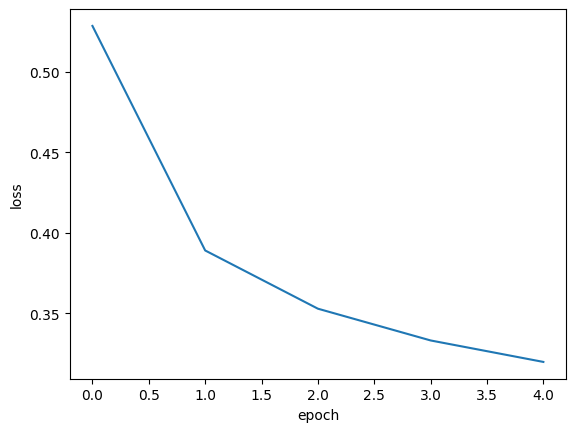

In [22]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
# plt.plot(hist.history['accuracy'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

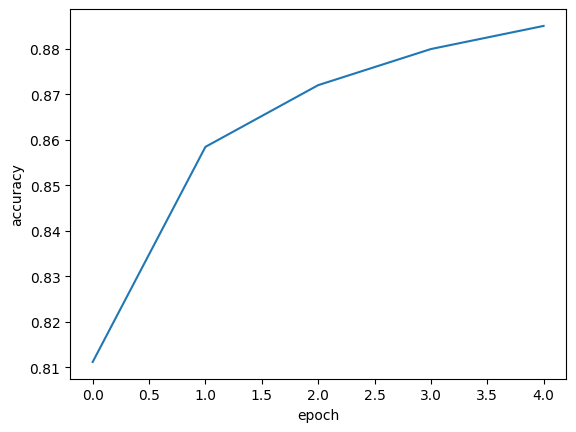

In [21]:
plt.plot(hist.history['accuracy'])

plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

### 더 오를 거 같으니까 epoch 값 늘리기

In [23]:
# 훈련 및 과정에 대한 history 보기
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
hist = model.fit(train_scaled,train_target,epochs=20,verbose=1)

Epoch 1/20
1500/1500 [==============================] - 1s 888us/step - loss: 0.3064 - accuracy: 0.8903
Epoch 2/20
1500/1500 [==============================] - 1s 714us/step - loss: 0.2979 - accuracy: 0.8929
Epoch 3/20
1500/1500 [==============================] - 1s 665us/step - loss: 0.2889 - accuracy: 0.8971
Epoch 4/20
1500/1500 [==============================] - 1s 703us/step - loss: 0.2799 - accuracy: 0.9006
Epoch 5/20
1500/1500 [==============================] - 1s 662us/step - loss: 0.2743 - accuracy: 0.9038
Epoch 6/20
1500/1500 [==============================] - 1s 718us/step - loss: 0.2673 - accuracy: 0.9052
Epoch 7/20
1500/1500 [==============================] - 1s 775us/step - loss: 0.2630 - accuracy: 0.9071
Epoch 8/20
1500/1500 [==============================] - 1s 708us/step - loss: 0.2534 - accuracy: 0.9100
Epoch 9/20
1500/1500 [==============================] - 1s 723us/step - loss: 0.2495 - accuracy: 0.9126
Epoch 10/20
1500/1500 [==============================] - 1s 793u

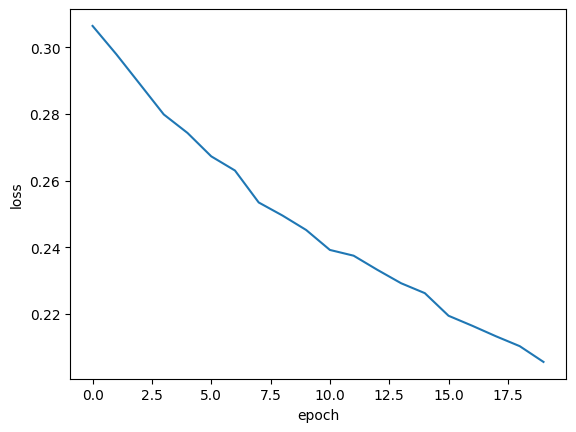

In [24]:
plt.plot(hist.history['loss'])
# plt.plot(hist.history['accuracy'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

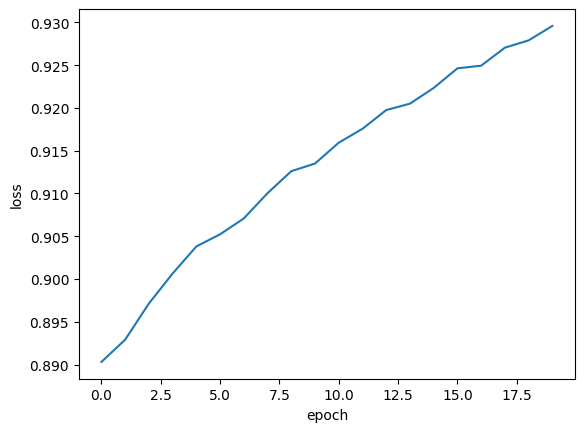

In [25]:
# plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

### 이렇게 하면 사기 당한거임
### Why? 예전 모델을 가지고 했기 때문에 이전 학습한 내용을 알고 있다.

In [26]:
# 모델 새로 만들기
model = model_fn()

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
hist = model.fit(train_scaled,train_target,epochs=20,verbose=1)

Epoch 1/20
1500/1500 [==============================] - 1s 745us/step - loss: 0.5360 - accuracy: 0.8124
Epoch 2/20
1500/1500 [==============================] - 1s 618us/step - loss: 0.3943 - accuracy: 0.8591
Epoch 3/20
1500/1500 [==============================] - 1s 628us/step - loss: 0.3554 - accuracy: 0.8709
Epoch 4/20
1500/1500 [==============================] - 1s 631us/step - loss: 0.3362 - accuracy: 0.8788
Epoch 5/20
1500/1500 [==============================] - 1s 697us/step - loss: 0.3204 - accuracy: 0.8841
Epoch 6/20
1500/1500 [==============================] - 1s 624us/step - loss: 0.3058 - accuracy: 0.8909
Epoch 7/20
1500/1500 [==============================] - 1s 615us/step - loss: 0.2968 - accuracy: 0.8947
Epoch 8/20
1500/1500 [==============================] - 1s 627us/step - loss: 0.2906 - accuracy: 0.8972
Epoch 9/20
1500/1500 [==============================] - 1s 665us/step - loss: 0.2826 - accuracy: 0.8987
Epoch 10/20
1500/1500 [==============================] - 1s 654u

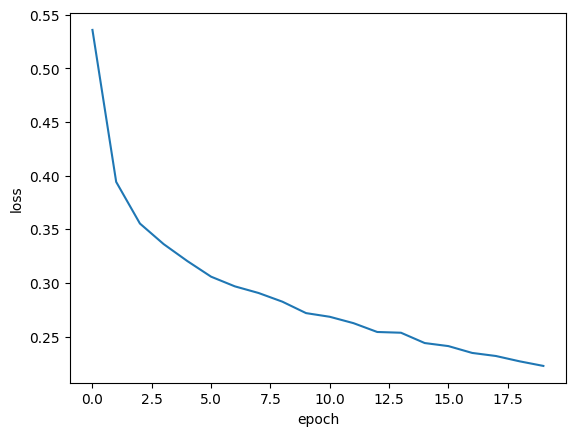

In [31]:
plt.plot(hist.history['loss'])
# plt.plot(hist.history['accuracy'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

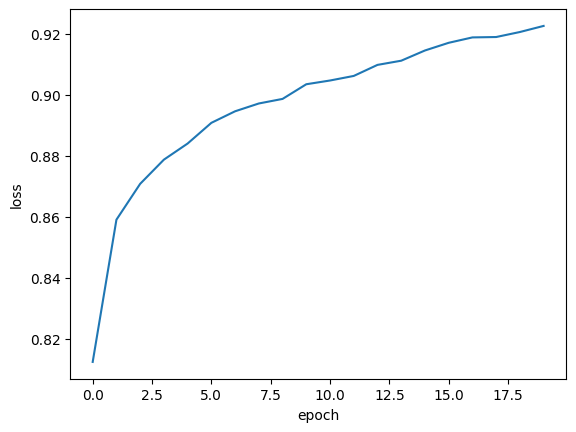

In [30]:
# plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

### 검증 손실
- train 하고 val 값 같이 보기 <br><br>
- 검증세트에 대한 정확도를 파악하기 위해 validation data를 사용한다. 

In [32]:
# 모델 새로 만들기
model = model_fn()

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
hist = model.fit(train_scaled,train_target,epochs=20,verbose=1,
                 validation_data=(val_scaled,val_target)
                 )

Epoch 1/20
1500/1500 [==============================] - 1s 870us/step - loss: 0.5351 - accuracy: 0.8102 - val_loss: 0.4473 - val_accuracy: 0.8492
Epoch 2/20
1500/1500 [==============================] - 1s 727us/step - loss: 0.3947 - accuracy: 0.8575 - val_loss: 0.3666 - val_accuracy: 0.8700
Epoch 3/20
1500/1500 [==============================] - 1s 769us/step - loss: 0.3566 - accuracy: 0.8705 - val_loss: 0.3725 - val_accuracy: 0.8698
Epoch 4/20
1500/1500 [==============================] - 1s 745us/step - loss: 0.3350 - accuracy: 0.8794 - val_loss: 0.3599 - val_accuracy: 0.8745
Epoch 5/20
1500/1500 [==============================] - 1s 776us/step - loss: 0.3211 - accuracy: 0.8848 - val_loss: 0.3809 - val_accuracy: 0.8636
Epoch 6/20
1500/1500 [==============================] - 1s 766us/step - loss: 0.3055 - accuracy: 0.8891 - val_loss: 0.4016 - val_accuracy: 0.8645
Epoch 7/20
1500/1500 [==============================] - 1s 824us/step - loss: 0.2988 - accuracy: 0.8944 - val_loss: 0.3894 -

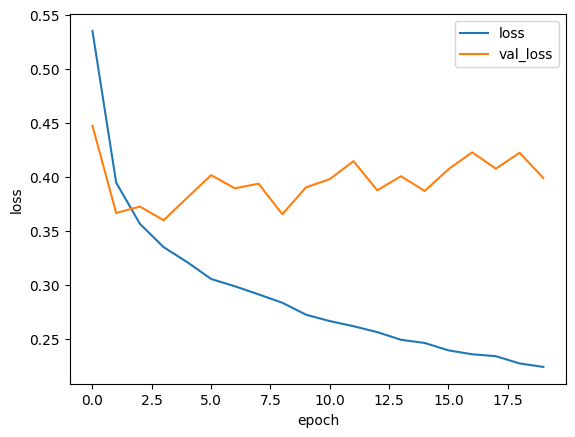

In [37]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

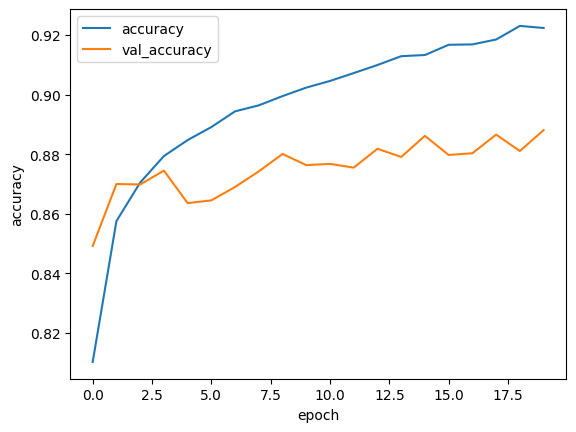

In [38]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

### 결론 : 과대적합한 모델이라는 것을 알 수 있다. 

In [39]:
# 모델 새로 만들기
model = model_fn()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
hist = model.fit(train_scaled,train_target,epochs=20,verbose=1,
                 validation_data=(val_scaled,val_target)
                 )

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5288 - accuracy: 0.8156 - val_loss: 0.4536 - val_accuracy: 0.8414
Epoch 2/20
1500/1500 [==============================] - 1s 806us/step - loss: 0.3961 - accuracy: 0.8601 - val_loss: 0.4115 - val_accuracy: 0.8518
Epoch 3/20
1500/1500 [==============================] - 1s 804us/step - loss: 0.3551 - accuracy: 0.8714 - val_loss: 0.3689 - val_accuracy: 0.8697
Epoch 4/20
1500/1500 [==============================] - 1s 869us/step - loss: 0.3290 - accuracy: 0.8809 - val_loss: 0.3639 - val_accuracy: 0.8708
Epoch 5/20
1500/1500 [==============================] - 1s 804us/step - loss: 0.3091 - accuracy: 0.8875 - val_loss: 0.3712 - val_accuracy: 0.8696
Epoch 6/20
1500/1500 [==============================] - 1s 815us/step - loss: 0.2952 - accuracy: 0.8911 - val_loss: 0.3412 - val_accuracy: 0.8748
Epoch 7/20
1500/1500 [==============================] - 1s 839us/step - loss: 0.2844 - accuracy: 0.8961 - val_loss: 0.3369 - v

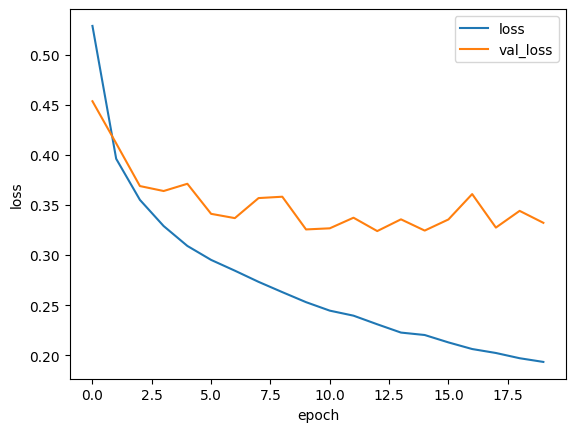

In [40]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

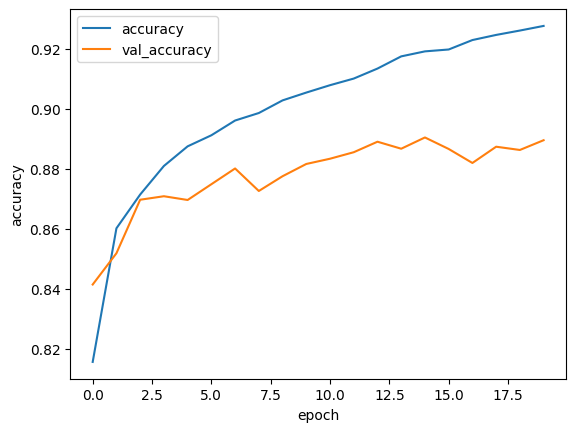

In [41]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

### 아까보다는 좋아진 것 같으나 더 좋아져야 된다 너는

### 규제 추가하기
- drop out 추가시키기

In [42]:
# 모델 새로 만들기
model = model_fn(keras.layers.Dropout(0.3)) # Dropout 30% 레이어 추가

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
hist = model.fit(train_scaled,train_target,epochs=20,verbose=1,
                 validation_data=(val_scaled,val_target)
                 )

Epoch 1/20
1500/1500 [==============================] - 2s 988us/step - loss: 0.5841 - accuracy: 0.7956 - val_loss: 0.4256 - val_accuracy: 0.8479
Epoch 2/20
1500/1500 [==============================] - 1s 862us/step - loss: 0.4359 - accuracy: 0.8418 - val_loss: 0.3893 - val_accuracy: 0.8583
Epoch 3/20
1500/1500 [==============================] - 1s 907us/step - loss: 0.4009 - accuracy: 0.8534 - val_loss: 0.3750 - val_accuracy: 0.8641
Epoch 4/20
1500/1500 [==============================] - 1s 899us/step - loss: 0.3813 - accuracy: 0.8596 - val_loss: 0.3672 - val_accuracy: 0.8702
Epoch 5/20
1500/1500 [==============================] - 1s 858us/step - loss: 0.3618 - accuracy: 0.8683 - val_loss: 0.3549 - val_accuracy: 0.8698
Epoch 6/20
1500/1500 [==============================] - 1s 858us/step - loss: 0.3515 - accuracy: 0.8699 - val_loss: 0.3716 - val_accuracy: 0.8622
Epoch 7/20
1500/1500 [==============================] - 1s 894us/step - loss: 0.3421 - accuracy: 0.8747 - val_loss: 0.3551 -

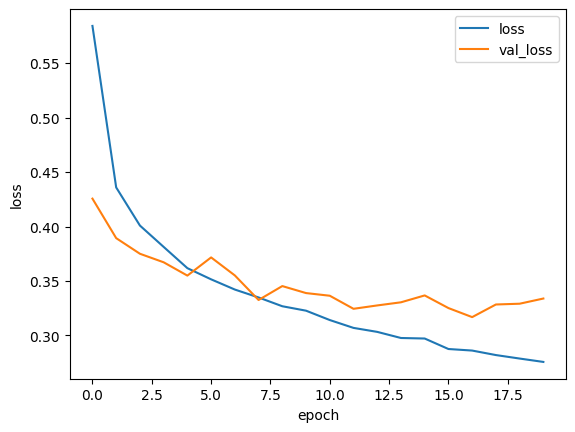

In [44]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

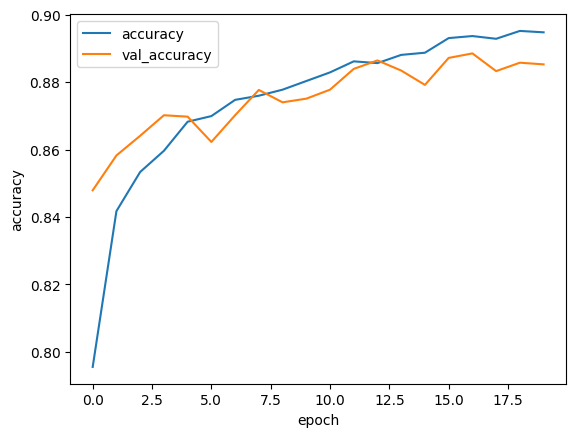

In [45]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

### 10 이후로 봤을 때 확률이나 loss가 비슷한 것 같다. epoch = 10 으로 해서 다시 하자.

In [46]:
model = model_fn(keras.layers.Dropout(0.3)) 

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
hist = model.fit(train_scaled,train_target,epochs=10,verbose=1,
                 validation_data=(val_scaled,val_target)
                 )

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5900 - accuracy: 0.7949 - val_loss: 0.4380 - val_accuracy: 0.8398
Epoch 2/10
1500/1500 [==============================] - 1s 948us/step - loss: 0.4359 - accuracy: 0.8429 - val_loss: 0.4078 - val_accuracy: 0.8539
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4060 - accuracy: 0.8520 - val_loss: 0.3636 - val_accuracy: 0.8683
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3803 - accuracy: 0.8615 - val_loss: 0.3587 - val_accuracy: 0.8724
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3666 - accuracy: 0.8653 - val_loss: 0.3684 - val_accuracy: 0.8682
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3527 - accuracy: 0.8707 - val_loss: 0.3504 - val_accuracy: 0.8728
Epoch 7/10
1500/1500 [==============================] - 1s 913us/step - loss: 0.3443 - accuracy: 0.8723 - val_loss: 0.3443 - val_accur

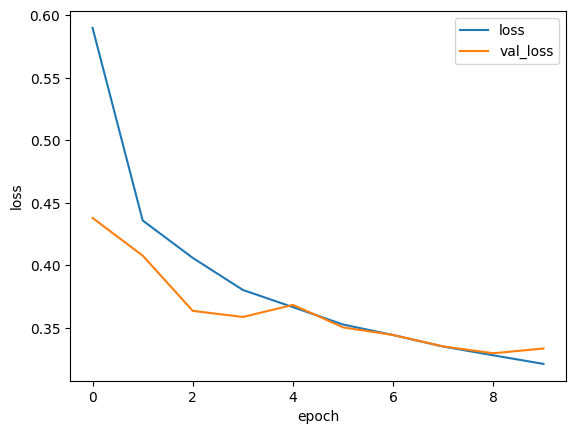

In [47]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

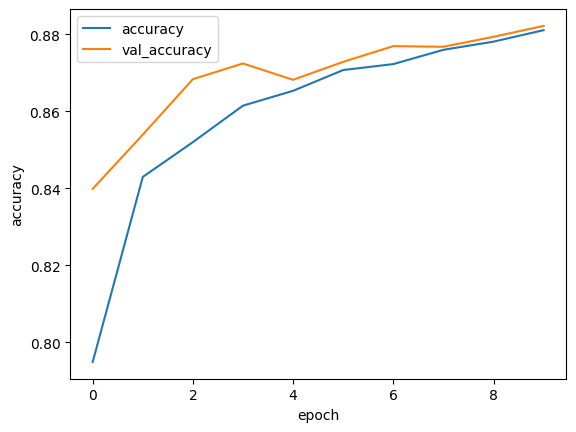

In [48]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

### 모델 저장하기
- hdf5 format 으로 저장한다. 

In [49]:
# model의 전체를 저장
model.save('./Data/model_whole.h5')

- tflite 저장하는 방법

In [ ]:
# tflite 저장하는 방법
# import tensorflow as tf

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save the model.
# with open('model.tflite', 'wb') as f:
#   f.write(tflite_model)

---
### callbacks
- 훈련 수행시 손실값이 제일 작은 함수를 저장한다. <- 굉장히 편함

In [51]:
model = model_fn(keras.layers.Dropout(0.3)) 

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./Data/best-model.h5') # 선언만 해 놓은 것
hist = model.fit(train_scaled,train_target,epochs=20,verbose=1,
                validation_data=(val_scaled,val_target),
                callbacks=[checkpoint_cb]
                 )

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5993 - accuracy: 0.7875 - val_loss: 0.4384 - val_accuracy: 0.8421
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4428 - accuracy: 0.8405 - val_loss: 0.3875 - val_accuracy: 0.8631
Epoch 3/20
1500/1500 [==============================] - 1s 897us/step - loss: 0.4056 - accuracy: 0.8530 - val_loss: 0.3791 - val_accuracy: 0.8569
Epoch 4/20
1500/1500 [==============================] - 1s 855us/step - loss: 0.3851 - accuracy: 0.8600 - val_loss: 0.3537 - val_accuracy: 0.8723
Epoch 5/20
1500/1500 [==============================] - 1s 885us/step - loss: 0.3681 - accuracy: 0.8649 - val_loss: 0.3496 - val_accuracy: 0.8756
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3563 - accuracy: 0.8688 - val_loss: 0.3363 - val_accuracy: 0.8795
Epoch 7/20
1500/1500 [==============================] - 1s 903us/step - loss: 0.3423 - accuracy: 0.8734 - val_loss: 0.3422 - val_a

In [52]:
model = keras.models.load_model('./Data/best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 677us/step - loss: 0.3248 - accuracy: 0.8898


[0.3248487710952759, 0.8897500038146973]

### Early Stopping(조기 종료)
- callback을 사용하여도 fit이 모두 끝나야지만 모델을 저장한다. <br><br>
- 이를 방지하고 epoch 반복시에 손실값이 많이 늘어나게 되면 조기 종료 시키는 방법이다. 

In [59]:
model = model_fn(keras.layers.Dropout(0.3)) 

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('./Data/real-best-model.h5') # 선언만 해 놓은 것
early_stoppin_cb = keras.callbacks.EarlyStopping(patience=2 , restore_best_weights=True) # 2를 보통 사용한다. 

hist = model.fit(train_scaled,train_target,epochs=100,verbose=1,
                validation_data=(val_scaled,val_target),
                callbacks=[checkpoint_cb, early_stoppin_cb]
                )

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5952 - accuracy: 0.7903 - val_loss: 0.4259 - val_accuracy: 0.8468
Epoch 2/100
1500/1500 [==============================] - 1s 894us/step - loss: 0.4400 - accuracy: 0.8419 - val_loss: 0.3902 - val_accuracy: 0.8617
Epoch 3/100
1500/1500 [==============================] - 1s 838us/step - loss: 0.4032 - accuracy: 0.8549 - val_loss: 0.3767 - val_accuracy: 0.8635
Epoch 4/100
1500/1500 [==============================] - 1s 924us/step - loss: 0.3828 - accuracy: 0.8603 - val_loss: 0.3595 - val_accuracy: 0.8687
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3625 - accuracy: 0.8666 - val_loss: 0.3482 - val_accuracy: 0.8737
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3537 - accuracy: 0.8701 - val_loss: 0.3446 - val_accuracy: 0.8733
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3421 - accuracy: 0.8739 - val_loss: 0.3550 - 

In [60]:
# 몇번째 epoch에서 stop 되었는가?
early_stoppin_cb.stopped_epoch

12

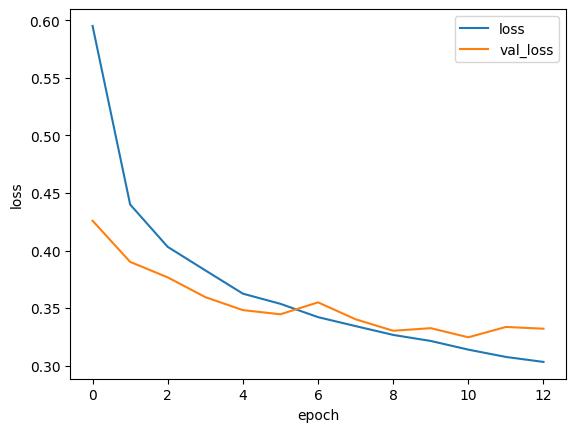

In [61]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()